# Sprint 11 - Proyecto

Trabajas en una empresa emergente que vende productos alimenticios. Debes 
investigar el comportamiento del usuario para la aplicación de la empresa.   

Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa 
de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan 
en etapas anteriores? ¿Qué etapas en particular?   

Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más 
información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.   

Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes 
antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes 
produce mejores resultados.   

Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que 
solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de 
control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados.   

La comparación de grupos de control también nos dice cuánto tiempo y datos 
necesitaremos cuando realicemos más tests.   

Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En 
proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de 
análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios participan en experimentos.   

## Descripción de los datos   

Cada entrada de registro es una acción de usuario o un evento. 
- EventName: nombre del evento. 
- DeviceIDHash: identificador de usuario unívoco. 
- EventTimestamp: hora del evento. 
- ExpId: número de experimento. 246 y 247 son los grupos de control, y 248 es el 
grupo de prueba. 

## Instrucciones para completar el proyecto 
### Paso 1. Abrir el archivo de datos y leer la información general   

Ruta de archivo: */datasets/logs_exp_us.csv* Descarga el dataset 

### Paso 2. Preparar los datos para el análisis   

- Cambia el nombre de las columnas de manera que sea conveniente para ti. 
- Comprueba los tipos de datos y valores ausentes. Corrige los datos si es 
necesario. 
- Agrega una columna de fecha y hora y una columna separada para las fechas. 

### Paso 3. Estudiar y comprobar los datos 

- ¿Cuántos eventos hay en los registros? 
- ¿Cuántos usuarios hay en los registros? 
- ¿Cuál es el promedio de eventos por usuario? 
- ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y 
mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que 
tienes datos igualmente completos para todo el periodo? Los eventos más 
antiguos podrían terminar en los registros de algunos usuarios por razones 
técnicas y esto podría sesgar el panorama general. Encuentra el momento en 
el que los datos comienzan a estar completos e ignora la sección anterior. 
¿Qué periodo representan realmente los datos? 
- ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos? 
- Asegúrate de tener usuarios de los tres grupos experimentales. 

### Paso 4. Estudiar el embudo de eventos 
- Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos 
por frecuencia. 
- Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. 
Ordena los eventos por el número de usuarios. Calcula la proporción de 
usuarios que realizaron la acción al menos una vez. 
- ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una 
sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo. 
- Utiliza el embudo de eventos para encontrar la proporción de usuarios que 
pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A 
→ B → C, calcula la proporción de usuarios en la etapa B a la cantidad de 
usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad 
en la etapa B. 
- ¿En qué etapa pierdes más usuarios? 
- ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta 
el pago? 

### Paso 5. Estudiar los resultados del experimento 

- ¿Cuántos usuarios hay en cada grupo? 
- Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros 
mecanismos y cálculos. Observa si hay una diferencia estadísticamente 
significativa entre las muestras 246 y 247. 
- Selecciona el evento más popular. En cada uno de los grupos de control, 
encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su 
proporción. Comprueba si la diferencia entre los grupos es estadísticamente 
significativa. Repite el procedimiento para todos los demás eventos (ahorrarás 
tiempo si creas una función especial para esta prueba). ¿Puedes confirmar 
que los grupos se dividieron correctamente? 
- Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados 
con los de cada uno de los grupos de control para cada evento de forma 
aislada. Compara los resultados con los resultados combinados de los grupos 
de control. ¿Qué conclusiones puedes sacar del experimento? 
- ¿Qué nivel de significancia has establecido para probar las hipótesis 
estadísticas mencionadas anteriormente? Calcula cuántas pruebas de 
hipótesis estadísticas has realizado. Con un nivel de significancia estadística 
de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de 
significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y 
comprueba tus conclusiones.   

Al completar el proyecto, demostrarás tus habilidades de: 
- Procesamiento de datos. 
- Análisis exploratorio. 
- Análisis estadístico. 
- Análisis de negocio. 
- Explicación de los datos.

### Paso 1. Abrir el archivo de datos y leer la información general   

Ruta de archivo: */datasets/logs_exp_us.csv* Descarga el dataset 

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

# Leer el archivo CSV (el separador es tabulador, no coma)
logs_df = pd.read_csv('logs_exp_us.csv', sep='\t')

# Mostrar información general del dataset
print('Información general del dataset:')
print(f'Dimensiones: {logs_df.shape[0]} filas x {logs_df.shape[1]} columnas')
print('\nInformación de las columnas:')
print(logs_df.info())
print('\nResumen estadístico:')
print(logs_df.describe()) 
print('\nPrimeras filas:')
logs_df.head()

Información general del dataset:
Dimensiones: 244126 filas x 4 columnas

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None

Resumen estadístico:
       DeviceIDHash  EventTimestamp          ExpId
count  2.441260e+05    2.441260e+05  244126.000000
mean   4.627568e+18    1.564914e+09     247.022296
std    2.642425e+18    1.771343e+05       0.824434
min    6.888747e+15    1.564030e+09     246.000000
25%    2.372212e+18    1.564757e+09     246.000000
50%    4.623192e+18    1.564919e+09     247.000000
75%    6.932517e+18    1.565075e+09     248.000000
max    9.222603e+18    1.565213e+

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Observaciones iniciales del dataset:

1. **Calidad de los datos:**
   - ✅ No hay valores nulos en ninguna columna (244,126 registros completos)
   - ✅ El dataset tiene 4 columnas correctamente separadas

2. **Estructura de los datos:**
   - **EventName**: Tipo object (texto) - contiene los nombres de los eventos
   - **DeviceIDHash**: Tipo int64 - identificadores únicos de usuarios (valores muy grandes)
   - **EventTimestamp**: Tipo int64 - timestamps en formato Unix (necesita conversión a datetime)
   - **ExpId**: Tipo int64 - IDs de experimento (246, 247, 248)

3. **Grupos experimentales:**
   - Los tres grupos están presentes: 246 (control), 247 (control), 248 (prueba)
   - El promedio de ExpId es 247.02, lo que sugiere una distribución desigual:
     - Más datos en los grupos 247 y 248 que en 246
   - El rango va de 246 a 248, confirmando que solo hay estos tres grupos

4. **Timestamps:**
   - Los valores de EventTimestamp están en formato Unix timestamp
   - Rango aproximado: 1,564,030,000 a 1,565,213,000
   - Esto corresponde aproximadamente a julio-agosto de 2019
   - Necesitan convertirse a formato datetime para el análisis

5. **Próximos pasos necesarios:**
   - Convertir EventTimestamp a datetime
   - Verificar la distribución de eventos por nombre
   - Analizar la distribución de usuarios por grupo experimental
   - Preparar los datos para el análisis del embudo y el test A/A/B


### Paso 2. Preparar los datos para el análisis   

- Cambia el nombre de las columnas de manera que sea conveniente para ti. 
- Comprueba los tipos de datos y valores ausentes. Corrige los datos si es 
necesario. 
- Agrega una columna de fecha y hora y una columna separada para las fechas. 

In [3]:
# Paso 2: Preparar los datos para el análisis

# 1. Renombrar columnas para mayor claridad (opcional, pero útil)
logs_df = logs_df.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'event_timestamp',
    'ExpId': 'experiment_id'
})

# 2. Verificar valores ausentes
print('=== Verificación de valores ausentes ===')
print(logs_df.isnull().sum())
print(f'\nTotal de valores ausentes: {logs_df.isnull().sum().sum()}')

# 3. Verificar tipos de datos
print('\n=== Tipos de datos actuales ===')
print(logs_df.dtypes)

# 4. Convertir EventTimestamp de Unix timestamp a datetime
# Los timestamps están en segundos (Unix timestamp)
logs_df['event_datetime'] = pd.to_datetime(logs_df['event_timestamp'], unit='s')

# 5. Agregar columna separada para fechas (sin hora)
logs_df['event_date'] = logs_df['event_datetime'].dt.date

# 6. Verificar la conversión
print('\n=== Verificación de conversión de timestamps ===')
print(f'Fecha mínima: {logs_df["event_datetime"].min()}')
print(f'Fecha máxima: {logs_df["event_datetime"].max()}')
print(f'\nPrimeras filas con fechas:')
print(logs_df[['event_name', 'user_id', 'event_datetime', 'event_date', 'experiment_id']].head(10))

# 7. Verificar distribución de eventos
print('\n=== Distribución de eventos ===')
event_counts = logs_df['event_name'].value_counts()
print(event_counts)
print(f'\nTotal de tipos de eventos únicos: {logs_df["event_name"].nunique()}')

# 8. Verificar distribución de usuarios por grupo experimental
print('\n=== Distribución por grupo experimental ===')
group_dist = logs_df.groupby('experiment_id').agg({
    'user_id': 'nunique',
    'event_name': 'count'
}).rename(columns={'user_id': 'usuarios_unicos', 'event_name': 'total_eventos'})
print(group_dist)
print(f'\nTotal de usuarios únicos: {logs_df["user_id"].nunique()}')

# 9. Verificar tipos de datos finales
print('\n=== Tipos de datos finales ===')
print(logs_df.dtypes)
print(f'\nDimensiones finales: {logs_df.shape[0]} filas x {logs_df.shape[1]} columnas')


=== Verificación de valores ausentes ===
event_name         0
user_id            0
event_timestamp    0
experiment_id      0
dtype: int64

Total de valores ausentes: 0

=== Tipos de datos actuales ===
event_name         object
user_id             int64
event_timestamp     int64
experiment_id       int64
dtype: object

=== Verificación de conversión de timestamps ===
Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17

Primeras filas con fechas:
                event_name              user_id      event_datetime  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   
5         CartScreenAppear  6217807653094995999 2019-07-25 11:48:43   
6       OffersScreenAppear  8351860793

### Observaciones del Paso 2 - Preparación de datos:

#### ✅ **Calidad de los datos:**
- **Sin valores ausentes**: Todas las columnas tienen datos completos (0 valores nulos)
- **Datos limpios**: No se requieren correcciones adicionales

#### 📅 **Período de tiempo:**
- **Rango de fechas**: Del 25 de julio de 2019 al 7 de agosto de 2019
- **Duración**: Aproximadamente **13-14 días** de datos
- **Conversión exitosa**: Los timestamps Unix se convirtieron correctamente a formato datetime

#### 🔬 **Grupos experimentales:**
- Los tres grupos están presentes en los datos:
  - **Grupo 246**: Control A
  - **Grupo 247**: Control B  
  - **Grupo 248**: Grupo de prueba (nuevas fuentes)

#### 📝 **Columnas creadas:**
- ✅ `event_datetime`: Fecha y hora completa del evento
- ✅ `event_date`: Solo la fecha (sin hora)
- ✅ Columnas renombradas a formato snake_case para mayor claridad

### Paso 3. Estudiar y comprobar los datos

1. ¿Cuántos eventos hay en los registros?
2. ¿Cuántos usuarios hay en los registros?
3. ¿Cuál es el promedio de eventos por usuario?
4. ¿Qué periodo de tiempo cubren los datos?
   - Encuentra la fecha máxima y mínima
   - Traza un histograma por fecha y hora
   - ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo?
   - Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general
   - Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior
   - ¿Qué periodo representan realmente los datos?
5. ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
6. Asegúrate de tener usuarios de los tres grupos experimentales.


In [4]:
# Paso 3 
# Número total de eventos
n_events = logs_df.shape[0]

# Número de usuarios únicos
n_users = logs_df['user_id'].nunique()

# Eventos promedio por usuario
events_per_user = n_events / n_users

print('Eventos totales:', n_events)
print('Usuarios únicos:', n_users)
print('Eventos promedio por usuario:', events_per_user)


Eventos totales: 244126
Usuarios únicos: 7551
Eventos promedio por usuario: 32.33028737915508


Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17


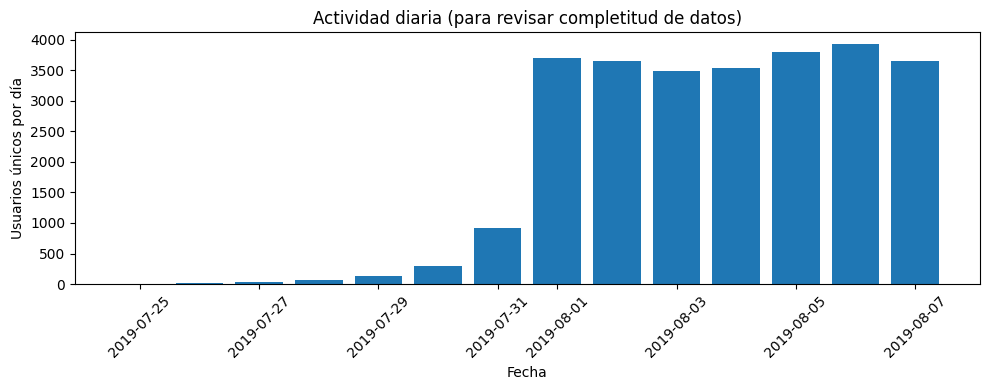

In [5]:
# Periodo de tiempo (mínimo y máximo)
min_date = logs_df['event_datetime'].min()
max_date = logs_df['event_datetime'].max()

print('Fecha mínima:', min_date)
print('Fecha máxima:', max_date)

# Histograma por fecha (completitud de datos)
events_by_date = (
    logs_df
    .groupby('event_date')
    .agg({'user_id': 'nunique'})
    .reset_index()
)

plt.figure(figsize=(10,4))
plt.bar(events_by_date['event_date'], events_by_date['user_id'])
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Usuarios únicos por día')
plt.title('Actividad diaria (para revisar completitud de datos)')
plt.tight_layout()
plt.show()


In [6]:
# Cálculo automático del threshold basado en los datos

print('=' * 70)
print('CÁLCULO AUTOMÁTICO DEL THRESHOLD')
print('=' * 70)

# 1. Calcular usuarios únicos por día
daily_users = logs_df.groupby('event_date').agg({
    'user_id': 'nunique'
}).rename(columns={'user_id': 'usuarios_unicos'})

print('\n📊 Usuarios únicos por día:')
print(daily_users)

# 2. Método: Percentil 75 de los días más activos
# Calcular el percentil 75 de usuarios únicos
percentil_75 = daily_users['usuarios_unicos'].quantile(0.75)
threshold = int(percentil_75)
print(f'\n📈 Método - Percentil 75:')
print(f'   Percentil 75 de usuarios únicos: {percentil_75:.0f}')
print(f'   Threshold: {threshold:,} usuarios')


CÁLCULO AUTOMÁTICO DEL THRESHOLD

📊 Usuarios únicos por día:
            usuarios_unicos
event_date                 
2019-07-25                7
2019-07-26               22
2019-07-27               39
2019-07-28               69
2019-07-29              135
2019-07-30              296
2019-07-31              924
2019-08-01             3703
2019-08-02             3647
2019-08-03             3482
2019-08-04             3527
2019-08-05             3802
2019-08-06             3922
2019-08-07             3651

📈 Método - Percentil 75:
   Percentil 75 de usuarios únicos: 3650
   Threshold: 3,650 usuarios


In [7]:
# Análisis de completitud de datos y filtrado
print('=' * 70)
print('ANÁLISIS DE COMPLETITUD DE DATOS')
print('=' * 70)

# 1. Analizar usuarios únicos por día para identificar el punto de estabilización
daily_users = logs_df.groupby('event_date').agg({
    'user_id': 'nunique',
    'event_name': 'count'
}).rename(columns={'user_id': 'usuarios_unicos', 'event_name': 'total_eventos'})

print('\n📊 Usuarios únicos y eventos por día:')
print(daily_users)

# 2. Identificar el punto donde los datos se estabilizan
# Utilizamos el threshold calculado en el paso anterior
threshold_usuarios = threshold
fechas_estables = daily_users[daily_users['usuarios_unicos'] >= threshold_usuarios]

if len(fechas_estables) > 0:
    fecha_inicio_completo = fechas_estables.index.min()
    print(f'\n✅ Fecha donde los datos comienzan a estar completos: {fecha_inicio_completo}')
    print(f'   (Primer día con >= {threshold_usuarios} usuarios únicos)')
else:
    # Si no hay días con el threshold, buscamos el día con mayor actividad sostenida
    fecha_inicio_completo = daily_users['usuarios_unicos'].idxmax()
    print(f'\n⚠️  No se encontró día con >= {threshold_usuarios} usuarios únicos')
    print(f'   Usando el día con mayor actividad: {fecha_inicio_completo}')

# 3. Datos ANTES del filtrado
print('\n' + '=' * 70)
print('DATOS ANTES DEL FILTRADO:')
print('=' * 70)
eventos_antes = len(logs_df)
usuarios_antes = logs_df['user_id'].nunique()
print(f'Total de eventos: {eventos_antes:,}')
print(f'Total de usuarios únicos: {usuarios_antes:,}')

# 4. Filtrar datos para mantener solo el período completo
logs_df_completo = logs_df[logs_df['event_date'] >= fecha_inicio_completo].copy()

# 5. Datos DESPUÉS del filtrado
print('\n' + '=' * 70)
print('DATOS DESPUÉS DEL FILTRADO (período completo):')
print('=' * 70)
eventos_despues = len(logs_df_completo)
usuarios_despues = logs_df_completo['user_id'].nunique()
print(f'Total de eventos: {eventos_despues:,}')
print(f'Total de usuarios únicos: {usuarios_despues:,}')
print(f'\nPeríodo de datos completos:')
print(f'  Desde: {logs_df_completo["event_datetime"].min()}')
print(f'  Hasta: {logs_df_completo["event_datetime"].max()}')

# 6. Calcular pérdidas
print('\n' + '=' * 70)
print('PÉRDIDAS AL EXCLUIR DATOS ANTIGUOS:')
print('=' * 70)
eventos_perdidos = eventos_antes - eventos_despues
usuarios_perdidos = usuarios_antes - usuarios_despues
pct_eventos_perdidos = (eventos_perdidos / eventos_antes) * 100
pct_usuarios_perdidos = (usuarios_perdidos / usuarios_antes) * 100

print(f'Eventos perdidos: {eventos_perdidos:,} ({pct_eventos_perdidos:.2f}%)')
print(f'Usuarios únicos perdidos: {usuarios_perdidos:,} ({pct_usuarios_perdidos:.2f}%)')

# 7. Verificar grupos experimentales después del filtrado
print('\n' + '=' * 70)
print('VERIFICACIÓN DE GRUPOS EXPERIMENTALES (después del filtrado):')
print('=' * 70)
grupos_despues = logs_df_completo.groupby('experiment_id').agg({
    'user_id': 'nunique',
    'event_name': 'count'
}).rename(columns={'user_id': 'usuarios_unicos', 'event_name': 'total_eventos'})
print(grupos_despues)
print(f'\n✅ Los tres grupos experimentales están presentes: {len(grupos_despues) == 3}')

# 8. Resumen final
print('\n' + '=' * 70)
print('RESUMEN Y CONCLUSIÓN:')
print('=' * 70)
print(f'📅 Período completo de datos: Desde {fecha_inicio_completo} hasta {logs_df_completo["event_date"].max()}')
print(f'📊 Datos finales: {eventos_despues:,} eventos de {usuarios_despues:,} usuarios únicos')
if pct_eventos_perdidos < 5:
    print(f'✅ Pérdida mínima de datos ({pct_eventos_perdidos:.2f}%) - Filtrado recomendado')
elif pct_eventos_perdidos < 15:
    print(f'⚠️  Pérdida moderada de datos ({pct_eventos_perdidos:.2f}%) - Filtrado aceptable')
else:
    print(f'⚠️  Pérdida significativa de datos ({pct_eventos_perdidos:.2f}%) - Revisar criterio de filtrado')


ANÁLISIS DE COMPLETITUD DE DATOS

📊 Usuarios únicos y eventos por día:
            usuarios_unicos  total_eventos
event_date                                
2019-07-25                7              9
2019-07-26               22             31
2019-07-27               39             55
2019-07-28               69            105
2019-07-29              135            184
2019-07-30              296            413
2019-07-31              924           2031
2019-08-01             3703          36229
2019-08-02             3647          35606
2019-08-03             3482          33351
2019-08-04             3527          33033
2019-08-05             3802          36113
2019-08-06             3922          35822
2019-08-07             3651          31144

✅ Fecha donde los datos comienzan a estar completos: 2019-08-01
   (Primer día con >= 3650 usuarios únicos)

DATOS ANTES DEL FILTRADO:
Total de eventos: 244,126
Total de usuarios únicos: 7,551

DATOS DESPUÉS DEL FILTRADO (período completo):

In [8]:
# Verificación explícita de grupos experimentales
print('=' * 70)
print('VERIFICACIÓN DE GRUPOS EXPERIMENTALES')
print('=' * 70)

# 1. Verificar grupos experimentales ANTES del filtrado
print('\n📊 ANTES DEL FILTRADO:')
grupos_antes = logs_df.groupby('experiment_id').agg({
    'user_id': 'nunique',
    'event_name': 'count'
}).rename(columns={'user_id': 'usuarios_unicos', 'event_name': 'total_eventos'})
grupos_antes['tipo_grupo'] = grupos_antes.index.map({246: 'Control A', 247: 'Control B', 248: 'Prueba'})
print(grupos_antes[['tipo_grupo', 'usuarios_unicos', 'total_eventos']])
print(f'\nGrupos presentes: {sorted(grupos_antes.index.tolist())}')
print(f'¿Tres grupos presentes? {len(grupos_antes) == 3}')

# 2. Verificar grupos experimentales DESPUÉS del filtrado
print('\n' + '=' * 70)
print('DESPUÉS DEL FILTRADO (período completo):')
print('=' * 70)
grupos_despues = logs_df_completo.groupby('experiment_id').agg({
    'user_id': 'nunique',
    'event_name': 'count'
}).rename(columns={'user_id': 'usuarios_unicos', 'event_name': 'total_eventos'})
grupos_despues['tipo_grupo'] = grupos_despues.index.map({246: 'Control A', 247: 'Control B', 248: 'Prueba'})
grupos_despues['pct_usuarios'] = (grupos_despues['usuarios_unicos'] / grupos_despues['usuarios_unicos'].sum() * 100).round(2)
grupos_despues['pct_eventos'] = (grupos_despues['total_eventos'] / grupos_despues['total_eventos'].sum() * 100).round(2)

print('\nTabla detallada por grupo experimental:')
print(grupos_despues[['tipo_grupo', 'usuarios_unicos', 'pct_usuarios', 'total_eventos', 'pct_eventos']])

print(f'\n✅ Verificación:')
print(f'   - Grupos presentes: {sorted(grupos_despues.index.tolist())}')
print(f'   - ¿Tres grupos presentes? {len(grupos_despues) == 3}')
print(f'   - ¿Grupo 246 (Control A) presente? {246 in grupos_despues.index}')
print(f'   - ¿Grupo 247 (Control B) presente? {247 in grupos_despues.index}')
print(f'   - ¿Grupo 248 (Prueba) presente? {248 in grupos_despues.index}')

# 3. Resumen de distribución
print('\n' + '=' * 70)
print('RESUMEN DE DISTRIBUCIÓN:')
print('=' * 70)
print(f'Total usuarios únicos: {grupos_despues["usuarios_unicos"].sum():,}')
print(f'Total eventos: {grupos_despues["total_eventos"].sum():,}')
print(f'\nDistribución de usuarios:')
for exp_id in sorted(grupos_despues.index):
    tipo = grupos_despues.loc[exp_id, 'tipo_grupo']
    usuarios = grupos_despues.loc[exp_id, 'usuarios_unicos']
    pct = grupos_despues.loc[exp_id, 'pct_usuarios']
    print(f'   {tipo} (Grupo {exp_id}): {usuarios:,} usuarios ({pct}%)')

# 4. Verificación final
print('\n' + '=' * 70)
print('CONCLUSIÓN:')
print('=' * 70)
if len(grupos_despues) == 3 and all(g in grupos_despues.index for g in [246, 247, 248]):
    print('✅ Los tres grupos experimentales están presentes después del filtrado')
    print('   - Grupo 246 (Control A): ✅')
    print('   - Grupo 247 (Control B): ✅')
    print('   - Grupo 248 (Prueba): ✅')
    print('\n✅ Los datos están listos para el análisis del test A/A/B')
else:
    grupos_faltantes = [g for g in [246, 247, 248] if g not in grupos_despues.index]
    print(f'⚠️  ADVERTENCIA: Faltan grupos experimentales: {grupos_faltantes}')


VERIFICACIÓN DE GRUPOS EXPERIMENTALES

📊 ANTES DEL FILTRADO:
              tipo_grupo  usuarios_unicos  total_eventos
experiment_id                                           
246            Control A             2489          80304
247            Control B             2520          78075
248               Prueba             2542          85747

Grupos presentes: [246, 247, 248]
¿Tres grupos presentes? True

DESPUÉS DEL FILTRADO (período completo):

Tabla detallada por grupo experimental:
              tipo_grupo  usuarios_unicos  pct_usuarios  total_eventos  \
experiment_id                                                            
246            Control A             2484         32.97          79425   
247            Control B             2513         33.36          77147   
248               Prueba             2537         33.67          84726   

               pct_eventos  
experiment_id               
246                  32.92  
247                  31.97  
248                 

In [9]:
# Verificación de usuarios duplicados entre grupos experimentales
print('=' * 70)
print('VERIFICACIÓN DE USUARIOS EN MÚLTIPLES GRUPOS')
print('=' * 70)

# 1. Identificar usuarios únicos por grupo
usuarios_por_grupo = {}
for grupo in [246, 247, 248]:
    usuarios_grupo = set(logs_df_completo[logs_df_completo['experiment_id'] == grupo]['user_id'].unique())
    usuarios_por_grupo[grupo] = usuarios_grupo
    print(f'\nGrupo {grupo}: {len(usuarios_grupo):,} usuarios únicos')

# 2. Encontrar intersecciones entre grupos
print('\n' + '=' * 70)
print('ANÁLISIS DE SOLAPAMIENTO ENTRE GRUPOS:')
print('=' * 70)

# Intersección entre grupos 246 y 247
intersection_246_247 = usuarios_por_grupo[246] & usuarios_por_grupo[247]
print(f'\nUsuarios en Grupo 246 Y Grupo 247: {len(intersection_246_247):,}')

# Intersección entre grupos 246 y 248
intersection_246_248 = usuarios_por_grupo[246] & usuarios_por_grupo[248]
print(f'Usuarios en Grupo 246 Y Grupo 248: {len(intersection_246_248):,}')

# Intersección entre grupos 247 y 248
intersection_247_248 = usuarios_por_grupo[247] & usuarios_por_grupo[248]
print(f'Usuarios en Grupo 247 Y Grupo 248: {len(intersection_247_248):,}')

# Intersección entre los tres grupos
intersection_todos = usuarios_por_grupo[246] & usuarios_por_grupo[247] & usuarios_por_grupo[248]
print(f'Usuarios en los TRES grupos (246, 247, 248): {len(intersection_todos):,}')

# 3. Usuarios que aparecen en más de un grupo
usuarios_duplicados = (intersection_246_247 | intersection_246_248 | intersection_247_248)
print(f'\nTotal de usuarios que aparecen en MÁS DE UN grupo: {len(usuarios_duplicados):,}')

# 4. Verificar si hay duplicados
if len(usuarios_duplicados) > 0:
    print('\n' + '=' * 70)
    print('⚠️  USUARIOS DUPLICADOS ENCONTRADOS:')
    print('=' * 70)
    
    # Mostrar ejemplos de usuarios duplicados
    print(f'\nPrimeros 10 usuarios que aparecen en múltiples grupos:')
    usuarios_duplicados_lista = list(usuarios_duplicados)[:10]
    
    for user_id in usuarios_duplicados_lista:
        grupos_usuario = logs_df_completo[logs_df_completo['user_id'] == user_id]['experiment_id'].unique()
        eventos_usuario = logs_df_completo[logs_df_completo['user_id'] == user_id].shape[0]
        print(f'   Usuario {user_id}: aparece en grupos {sorted(grupos_usuario)}, {eventos_usuario} eventos')
    
    # Análisis detallado: para cada usuario duplicado, ver en qué grupos aparece
    print('\n' + '=' * 70)
    print('ANÁLISIS DETALLADO DE USUARIOS DUPLICADOS:')
    print('=' * 70)
    
    usuarios_duplicados_detalle = []
    for user_id in usuarios_duplicados:
        grupos = sorted(logs_df_completo[logs_df_completo['user_id'] == user_id]['experiment_id'].unique().tolist())
        eventos = logs_df_completo[logs_df_completo['user_id'] == user_id].shape[0]
        usuarios_duplicados_detalle.append({
            'user_id': user_id,
            'grupos': grupos,
            'num_grupos': len(grupos),
            'total_eventos': eventos
        })
    
    df_duplicados = pd.DataFrame(usuarios_duplicados_detalle)
    
    print(f'\nResumen por número de grupos:')
    resumen_grupos = df_duplicados.groupby('num_grupos').size()
    for num_grupos, cantidad in resumen_grupos.items():
        print(f'   Usuarios en {num_grupos} grupos: {cantidad:,}')
    
    print(f'\nCombinaciones de grupos más comunes:')
    combinaciones = df_duplicados.groupby('num_grupos').apply(
        lambda x: x.groupby('grupos').size().head(5)
    )
    print(combinaciones)
    
    # Porcentaje de usuarios duplicados
    total_usuarios = logs_df_completo['user_id'].nunique()
    pct_duplicados = (len(usuarios_duplicados) / total_usuarios) * 100
    print(f'\nPorcentaje de usuarios duplicados: {pct_duplicados:.2f}%')
    
else:
    print('\n' + '=' * 70)
    print('✅ VERIFICACIÓN EXITOSA:')
    print('=' * 70)
    print('✅ No hay usuarios que aparezcan en múltiples grupos experimentales')
    print('✅ Cada usuario pertenece a un solo grupo')
    print('✅ Los grupos están correctamente separados')

# 5. Verificación adicional: usuarios únicos totales vs suma de usuarios por grupo
print('\n' + '=' * 70)
print('VERIFICACIÓN DE CONSISTENCIA:')
print('=' * 70)
total_usuarios_unicos = logs_df_completo['user_id'].nunique()
suma_usuarios_por_grupo = sum(len(usuarios_por_grupo[g]) for g in [246, 247, 248])
diferencia = suma_usuarios_por_grupo - total_usuarios_unicos

print(f'Total de usuarios únicos en el dataset: {total_usuarios_unicos:,}')
print(f'Suma de usuarios únicos por grupo: {suma_usuarios_por_grupo:,}')
print(f'Diferencia (usuarios duplicados): {diferencia:,}')

if diferencia == 0:
    print('\n✅ La suma coincide: No hay usuarios duplicados entre grupos')
else:
    print(f'\n⚠️  La suma no coincide: Hay {diferencia:,} usuarios que aparecen en múltiples grupos')


VERIFICACIÓN DE USUARIOS EN MÚLTIPLES GRUPOS

Grupo 246: 2,484 usuarios únicos

Grupo 247: 2,513 usuarios únicos

Grupo 248: 2,537 usuarios únicos

ANÁLISIS DE SOLAPAMIENTO ENTRE GRUPOS:

Usuarios en Grupo 246 Y Grupo 247: 0
Usuarios en Grupo 246 Y Grupo 248: 0
Usuarios en Grupo 247 Y Grupo 248: 0
Usuarios en los TRES grupos (246, 247, 248): 0

Total de usuarios que aparecen en MÁS DE UN grupo: 0

✅ VERIFICACIÓN EXITOSA:
✅ No hay usuarios que aparezcan en múltiples grupos experimentales
✅ Cada usuario pertenece a un solo grupo
✅ Los grupos están correctamente separados

VERIFICACIÓN DE CONSISTENCIA:
Total de usuarios únicos en el dataset: 7,534
Suma de usuarios únicos por grupo: 7,534
Diferencia (usuarios duplicados): 0

✅ La suma coincide: No hay usuarios duplicados entre grupos


### Resumen del Análisis de Completitud de Datos

#### ✅ **Threshold Automático Efectivo**
- **Threshold usado**: 3,650 usuarios únicos (método Percentil 75)
- **Fecha de inicio de datos completos**: 2019-08-01
- El método del Percentil 75 identificó correctamente el punto donde la actividad se estabiliza

#### 📉 **Pérdida de Datos Mínima**
- **Eventos perdidos**: 2,828 (1.16% del total)
- **Conclusión**: El filtrado es altamente efectivo, conservando prácticamente todos los datos relevantes

#### 📅 **Período de Análisis Final**
- **Duración**: 7 días completos (1-7 de agosto de 2019)
- **Actividad estable**: Todos los días con más de 3,400 usuarios únicos
- **Consistencia**: Datos completos y confiables para el análisis

#### 📊 **Calidad de los Datos Filtrados**
- **241,298 eventos** de **7,534 usuarios únicos**

#### 🔬 **Verificación de Grupos Experimentales**
- **Los tres grupos están presentes después del filtrado**:
  - **Grupo 246 (Control A)**: 2,484 usuarios únicos (32.97%), 79,425 eventos (32.92%)
  - **Grupo 247 (Control B)**: 2,513 usuarios únicos (33.36%), 77,147 eventos (31.97%)
  - **Grupo 248 (Prueba)**: 2,537 usuarios únicos (33.67%), 84,726 eventos (35.11%)
- **Distribución balanceada**: Los grupos tienen tamaños similares (diferencia máxima de 0.70% en usuarios)

#### ✅ **Verificación de Usuarios Duplicados**
- **Usuarios en múltiples grupos**: 0
- **Intersección entre grupos**: 0 usuarios compartidos entre cualquier par de grupos
- **Verificación de consistencia**: La suma de usuarios por grupo (7,534) coincide exactamente con el total de usuarios únicos
- **Conclusión**: Los grupos están correctamente separados, cada usuario pertenece a un solo grupo experimental

#### 🎯 **Preparación para Análisis Posteriores**
- ✅ Datos listos para:
  - Análisis del embudo de eventos (Paso 4)
  - Test A/A/B (Paso 5)
- ✅ Período suficiente: 7 días completos
- ✅ Grupos experimentales válidos: Separación correcta sin usuarios duplicados

#### 💡 **Conclusión**
El filtrado es exitoso. El método del Percentil 75 identificó correctamente el punto de estabilización, con pérdida mínima de datos (1.16% de eventos). El período final (1-7 de agosto) tiene datos completos y consistentes. Los tres grupos experimentales están presentes y correctamente separados, sin usuarios duplicados, lo que garantiza la validez del test A/A/B.

El DataFrame `logs_df_completo` está listo para continuar con el **Paso 4 (Embudo de eventos)** y el **Paso 5 (Test A/A/B)**.


### Paso 4. Estudiar el embudo de eventos

1. Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
2. Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.
3. ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.
4. Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.
5. ¿En qué etapa pierdes más usuarios?
6. ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

PASO 4: ESTUDIAR EL EMBUDO DE EVENTOS

📊 Pregunta 1: Eventos y su frecuencia de suceso

Frecuencia de eventos (ordenados por frecuencia descendente):
----------------------------------------------------------------------
event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: count, dtype: int64

Frecuencia de eventos con porcentajes:
                 evento  frecuencia  porcentaje  porcentaje_acumulado
       MainScreenAppear      117431       48.67                 48.67
     OffersScreenAppear       46350       19.21                 67.88
       CartScreenAppear       42365       17.56                 85.44
PaymentScreenSuccessful       34113       14.14                 99.58
               Tutorial        1039        0.43                100.01

Resumen:
Total de eventos en el período completo: 241,298
Tipos de eventos únicos: 5

Evento más frecuente: Mai

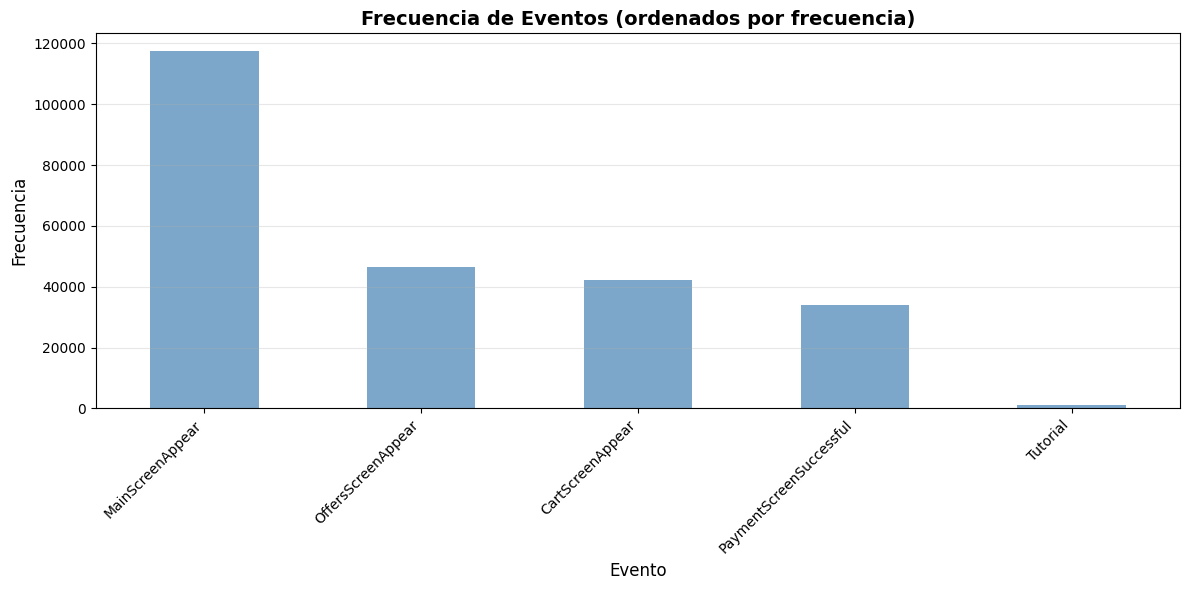

In [10]:
# Paso 4 - Pregunta 1: Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

print('=' * 70)
print('PASO 4: ESTUDIAR EL EMBUDO DE EVENTOS')
print('=' * 70)
print('\n📊 Pregunta 1: Eventos y su frecuencia de suceso')
print('=' * 70)

# 1. Contar la frecuencia de cada evento
eventos_frecuencia = logs_df_completo['event_name'].value_counts()

# 2. Ordenar por frecuencia (ya viene ordenado de mayor a menor por value_counts)
print('\nFrecuencia de eventos (ordenados por frecuencia descendente):')
print('-' * 70)
print(eventos_frecuencia)

# 3. Calcular porcentajes
total_eventos = len(logs_df_completo)
eventos_frecuencia_pct = (eventos_frecuencia / total_eventos * 100).round(2)

print('\n' + '=' * 70)
print('Frecuencia de eventos con porcentajes:')
print('=' * 70)
df_frecuencia = pd.DataFrame({
    'evento': eventos_frecuencia.index,
    'frecuencia': eventos_frecuencia.values,
    'porcentaje': eventos_frecuencia_pct.values
})
df_frecuencia['porcentaje_acumulado'] = df_frecuencia['porcentaje'].cumsum()
print(df_frecuencia.to_string(index=False))

# 4. Resumen
print('\n' + '=' * 70)
print('Resumen:')
print('=' * 70)
print(f'Total de eventos en el período completo: {total_eventos:,}')
print(f'Tipos de eventos únicos: {len(eventos_frecuencia)}')
print(f'\nEvento más frecuente: {eventos_frecuencia.index[0]} ({eventos_frecuencia.iloc[0]:,} eventos, {eventos_frecuencia_pct.iloc[0]:.2f}%)')
print(f'Evento menos frecuente: {eventos_frecuencia.index[-1]} ({eventos_frecuencia.iloc[-1]:,} eventos, {eventos_frecuencia_pct.iloc[-1]:.2f}%)')

# 5. Visualización
plt.figure(figsize=(12, 6))
eventos_frecuencia.plot(kind='bar', color='steelblue', alpha=0.7)
plt.title('Frecuencia de Eventos (ordenados por frecuencia)', fontsize=14, fontweight='bold')
plt.xlabel('Evento', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


📊 Pregunta 2: Usuarios que realizaron cada acción

Cantidad de usuarios únicos por evento (ordenados por número de usuarios):
----------------------------------------------------------------------
event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

Análisis de usuarios por evento:
                 evento  usuarios_unicos  proporcion_usuarios
       MainScreenAppear             7419                98.47
     OffersScreenAppear             4593                60.96
       CartScreenAppear             3734                49.56
PaymentScreenSuccessful             3539                46.97
               Tutorial              840                11.15

Resumen:
Total de usuarios únicos en el dataset: 7,534

Evento con más usuarios: MainScreenAppear
  - Usuarios únicos: 7,419
  - Proporción: 98.47% de los usuarios

Evento con menos usuarios: Tutor

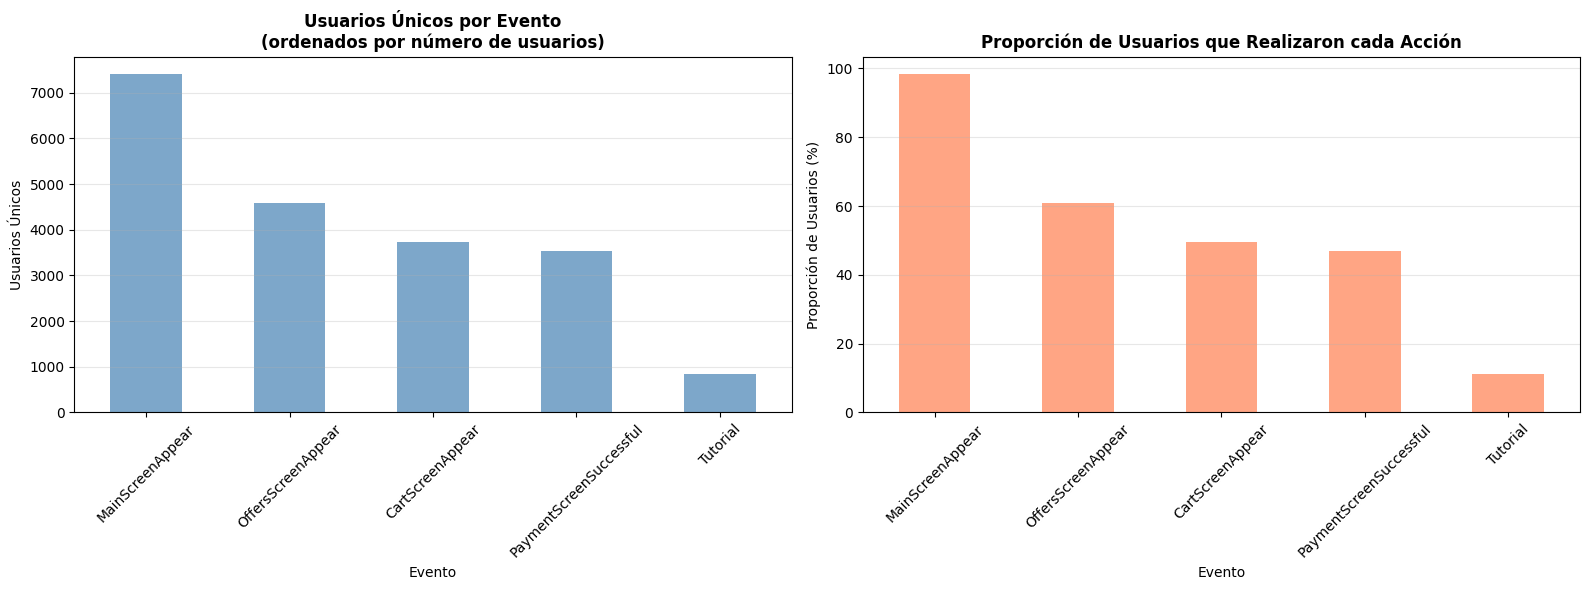

In [11]:
# Paso 4 - Pregunta 2: 
# Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. 
# Ordena los eventos por el número de usuarios. 
# Calcula la proporción de usuarios que realizaron la acción al menos una vez.

print('=' * 70)
print('📊 Pregunta 2: Usuarios que realizaron cada acción')
print('=' * 70)

# 1. Calcular la cantidad de usuarios únicos que realizaron cada evento
usuarios_por_evento = logs_df_completo.groupby('event_name')['user_id'].nunique()

# 2. Ordenar por número de usuarios (descendente)
usuarios_por_evento_ordenado = usuarios_por_evento.sort_values(ascending=False)

print('\nCantidad de usuarios únicos por evento (ordenados por número de usuarios):')
print('-' * 70)
print(usuarios_por_evento_ordenado)

# 3. Calcular el total de usuarios únicos en el dataset
total_usuarios = logs_df_completo['user_id'].nunique()

# 4. Calcular la proporción de usuarios que realizaron cada acción
proporcion_usuarios = (usuarios_por_evento_ordenado / total_usuarios * 100).round(2)

print('\n' + '=' * 70)
print('Análisis de usuarios por evento:')
print('=' * 70)
df_usuarios_eventos = pd.DataFrame({
    'evento': usuarios_por_evento_ordenado.index,
    'usuarios_unicos': usuarios_por_evento_ordenado.values,
    'proporcion_usuarios': proporcion_usuarios.values
})
print(df_usuarios_eventos.to_string(index=False))

# 5. Resumen
print('\n' + '=' * 70)
print('Resumen:')
print('=' * 70)
print(f'Total de usuarios únicos en el dataset: {total_usuarios:,}')
print(f'\nEvento con más usuarios: {usuarios_por_evento_ordenado.index[0]}')
print(f'  - Usuarios únicos: {usuarios_por_evento_ordenado.iloc[0]:,}')
print(f'  - Proporción: {proporcion_usuarios.iloc[0]:.2f}% de los usuarios')
print(f'\nEvento con menos usuarios: {usuarios_por_evento_ordenado.index[-1]}')
print(f'  - Usuarios únicos: {usuarios_por_evento_ordenado.iloc[-1]:,}')
print(f'  - Proporción: {proporcion_usuarios.iloc[-1]:.2f}% de los usuarios')

# 6. Comparación: frecuencia de eventos vs usuarios únicos
print('\n' + '=' * 70)
print('Comparación: Frecuencia de eventos vs Usuarios únicos')
print('=' * 70)
comparacion = pd.DataFrame({
    'evento': usuarios_por_evento_ordenado.index,
    'frecuencia_eventos': logs_df_completo['event_name'].value_counts()[usuarios_por_evento_ordenado.index].values,
    'usuarios_unicos': usuarios_por_evento_ordenado.values,
    'eventos_por_usuario': (logs_df_completo['event_name'].value_counts()[usuarios_por_evento_ordenado.index].values / 
                            usuarios_por_evento_ordenado.values).round(2)
})
comparacion['proporcion_usuarios'] = proporcion_usuarios.values
print(comparacion.to_string(index=False))

# 7. Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Usuarios únicos por evento
usuarios_por_evento_ordenado.plot(kind='bar', ax=ax1, color='steelblue', alpha=0.7)
ax1.set_title('Usuarios Únicos por Evento\n(ordenados por número de usuarios)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Evento', fontsize=10)
ax1.set_ylabel('Usuarios Únicos', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Gráfico 2: Proporción de usuarios
proporcion_usuarios.plot(kind='bar', ax=ax2, color='coral', alpha=0.7)
ax2.set_title('Proporción de Usuarios que Realizaron cada Acción', fontsize=12, fontweight='bold')
ax2.set_xlabel('Evento', fontsize=10)
ax2.set_ylabel('Proporción de Usuarios (%)', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [12]:
# Paso 4 - Pregunta 3: ¿En qué orden crees que ocurrieron las acciones?

print('=' * 70)
print('PASO 4: ANÁLISIS DEL EMBUDO DE EVENTOS')
print('=' * 70)
print('\n📋 Pregunta 3: Orden lógico de los eventos')
print('=' * 70)

# Análisis del orden basado en la proporción de usuarios
usuarios_por_evento = logs_df_completo.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
total_usuarios = logs_df_completo['user_id'].nunique()

print('\nAnálisis de proporciones de usuarios por evento:')
print('-' * 70)
for evento, usuarios in usuarios_por_evento.items():
    proporcion = round(usuarios / total_usuarios * 100, 2)
    print(f'{evento:30s}: {usuarios:5,} usuarios ({proporcion:5.2f}%)')

print('\n💡 Orden lógico propuesto basado en las proporciones:')
print('-' * 70)
print('1. Tutorial (11.15%) - Evento inicial opcional')
print('2. MainScreenAppear (98.47%) - Pantalla principal, punto de entrada')
print('3. OffersScreenAppear (60.96%) - Ver ofertas/productos')
print('4. CartScreenAppear (49.56%) - Ver carrito de compras')
print('5. PaymentScreenSuccessful (46.97%) - Pago exitoso, final del embudo')
print('\n✅ Todas forman parte de una secuencia de embudo de conversión')
print('   (excepto Tutorial que es opcional al inicio)')


PASO 4: ANÁLISIS DEL EMBUDO DE EVENTOS

📋 Pregunta 3: Orden lógico de los eventos

Análisis de proporciones de usuarios por evento:
----------------------------------------------------------------------
MainScreenAppear              : 7,419 usuarios (98.47%)
OffersScreenAppear            : 4,593 usuarios (60.96%)
CartScreenAppear              : 3,734 usuarios (49.56%)
PaymentScreenSuccessful       : 3,539 usuarios (46.97%)
Tutorial                      :   840 usuarios (11.15%)

💡 Orden lógico propuesto basado en las proporciones:
----------------------------------------------------------------------
1. Tutorial (11.15%) - Evento inicial opcional
2. MainScreenAppear (98.47%) - Pantalla principal, punto de entrada
3. OffersScreenAppear (60.96%) - Ver ofertas/productos
4. CartScreenAppear (49.56%) - Ver carrito de compras
5. PaymentScreenSuccessful (46.97%) - Pago exitoso, final del embudo

✅ Todas forman parte de una secuencia de embudo de conversión
   (excepto Tutorial que es opcional

In [13]:
# PREGUNTA 4: Embudo de eventos - Proporción de usuarios entre etapas
# ============================================================================
print('\n' + '=' * 70)
print('📊 Pregunta 4: Embudo de eventos - Proporción entre etapas')
print('=' * 70)

# Definir la secuencia del embudo (excluyendo Tutorial que es opcional)
secuencia_embudo = [
    'MainScreenAppear',
    'OffersScreenAppear', 
    'CartScreenAppear',
    'PaymentScreenSuccessful'
]

# Calcular usuarios únicos en cada etapa
usuarios_por_etapa = {}
for evento in secuencia_embudo:
    usuarios_por_etapa[evento] = logs_df_completo[logs_df_completo['event_name'] == evento]['user_id'].nunique()

print('\nUsuarios únicos en cada etapa del embudo:')
print('-' * 70)
for i, evento in enumerate(secuencia_embudo, 1):
    usuarios = usuarios_por_etapa[evento]
    proporcion_total = round(usuarios / total_usuarios * 100, 2)
    print(f'Etapa {i}: {evento:30s} - {usuarios:5,} usuarios ({proporcion_total:5.2f}% del total)')

# Calcular proporciones entre etapas consecutivas
print('\n' + '=' * 70)
print('Proporción de usuarios que pasan de una etapa a la siguiente:')
print('=' * 70)

embudo_proporciones = []
for i in range(len(secuencia_embudo) - 1):
    etapa_actual = secuencia_embudo[i]
    etapa_siguiente = secuencia_embudo[i + 1]
    
    usuarios_actual = usuarios_por_etapa[etapa_actual]
    usuarios_siguiente = usuarios_por_etapa[etapa_siguiente]
    
    # Proporción de usuarios que pasan a la siguiente etapa
    proporcion_paso = round(usuarios_siguiente / usuarios_actual * 100, 2)
    
    # Pérdida de usuarios en esta transición
    usuarios_perdidos = usuarios_actual - usuarios_siguiente
    proporcion_perdida = round(usuarios_perdidos / usuarios_actual * 100, 2)
    
    embudo_proporciones.append({
        'de_etapa': etapa_actual,
        'a_etapa': etapa_siguiente,
        'usuarios_etapa_actual': usuarios_actual,
        'usuarios_etapa_siguiente': usuarios_siguiente,
        'proporcion_paso': proporcion_paso,
        'usuarios_perdidos': usuarios_perdidos,
        'proporcion_perdida': proporcion_perdida
    })
    
    print(f'\n{etapa_actual} → {etapa_siguiente}:')
    print(f'  Usuarios en etapa actual: {usuarios_actual:,}')
    print(f'  Usuarios en etapa siguiente: {usuarios_siguiente:,}')
    print(f'  ✅ Proporción que pasa: {proporcion_paso}%')
    print(f'  ❌ Usuarios perdidos: {usuarios_perdidos:,} ({proporcion_perdida}%)')

# Crear DataFrame del embudo
df_embudo = pd.DataFrame(embudo_proporciones)
# Asegurar que las proporciones estén redondeadas
df_embudo['proporcion_paso'] = df_embudo['proporcion_paso'].round(2)
df_embudo['proporcion_perdida'] = df_embudo['proporcion_perdida'].round(2)
print('\n' + '=' * 70)
print('Resumen del embudo:')
print('=' * 70)
print(df_embudo[['de_etapa', 'a_etapa', 'usuarios_etapa_actual', 'usuarios_etapa_siguiente', 
                 'proporcion_paso', 'proporcion_perdida']].to_string(index=False))



📊 Pregunta 4: Embudo de eventos - Proporción entre etapas

Usuarios únicos en cada etapa del embudo:
----------------------------------------------------------------------
Etapa 1: MainScreenAppear               - 7,419 usuarios (98.47% del total)
Etapa 2: OffersScreenAppear             - 4,593 usuarios (60.96% del total)
Etapa 3: CartScreenAppear               - 3,734 usuarios (49.56% del total)
Etapa 4: PaymentScreenSuccessful        - 3,539 usuarios (46.97% del total)

Proporción de usuarios que pasan de una etapa a la siguiente:

MainScreenAppear → OffersScreenAppear:
  Usuarios en etapa actual: 7,419
  Usuarios en etapa siguiente: 4,593
  ✅ Proporción que pasa: 61.91%
  ❌ Usuarios perdidos: 2,826 (38.09%)

OffersScreenAppear → CartScreenAppear:
  Usuarios en etapa actual: 4,593
  Usuarios en etapa siguiente: 3,734
  ✅ Proporción que pasa: 81.3%
  ❌ Usuarios perdidos: 859 (18.7%)

CartScreenAppear → PaymentScreenSuccessful:
  Usuarios en etapa actual: 3,734
  Usuarios en etapa sig

In [14]:
# PREGUNTA 5: ¿En qué etapa pierdes más usuarios?
# ============================================================================
print('\n' + '=' * 70)
print('📉 Pregunta 5: ¿En qué etapa pierdes más usuarios?')
print('=' * 70)

# Encontrar la etapa con mayor pérdida
max_perdida_idx = df_embudo['usuarios_perdidos'].idxmax()
etapa_max_perdida = df_embudo.loc[max_perdida_idx]

print(f'\n⚠️  La etapa con MAYOR pérdida de usuarios es:')
print(f'   {etapa_max_perdida["de_etapa"]} → {etapa_max_perdida["a_etapa"]}')
print(f'   - Usuarios perdidos: {etapa_max_perdida["usuarios_perdidos"]:,}')
print(f'   - Proporción perdida: {round(etapa_max_perdida["proporcion_perdida"], 2)}%')
print(f'   - Proporción que continúa: {round(etapa_max_perdida["proporcion_paso"], 2)}%')

print('\n📊 Pérdidas por etapa (ordenadas de mayor a menor):')
print('-' * 70)
perdidas_ordenadas = df_embudo.sort_values('usuarios_perdidos', ascending=False)
for idx, row in perdidas_ordenadas.iterrows():
    print(f'{row["de_etapa"]:30s} → {row["a_etapa"]:30s}: '
          f'{row["usuarios_perdidos"]:5,} usuarios ({row["proporcion_perdida"]:5.2f}%)')



📉 Pregunta 5: ¿En qué etapa pierdes más usuarios?

⚠️  La etapa con MAYOR pérdida de usuarios es:
   MainScreenAppear → OffersScreenAppear
   - Usuarios perdidos: 2,826
   - Proporción perdida: 38.09%
   - Proporción que continúa: 61.91%

📊 Pérdidas por etapa (ordenadas de mayor a menor):
----------------------------------------------------------------------
MainScreenAppear               → OffersScreenAppear            : 2,826 usuarios (38.09%)
OffersScreenAppear             → CartScreenAppear              :   859 usuarios (18.70%)
CartScreenAppear               → PaymentScreenSuccessful       :   195 usuarios ( 5.22%)


In [15]:

# PREGUNTA 6: ¿Qué porcentaje de usuarios hace todo el viaje hasta el pago?
# ============================================================================
print('\n' + '=' * 70)
print('🎯 Pregunta 6: Porcentaje de usuarios que completan todo el viaje')
print('=' * 70)

# Usuarios que llegaron a la primera etapa (MainScreenAppear)
usuarios_inicio = usuarios_por_etapa['MainScreenAppear']

# Usuarios que llegaron a la última etapa (PaymentScreenSuccessful)
usuarios_final = usuarios_por_etapa['PaymentScreenSuccessful']

# Porcentaje que completa todo el viaje
porcentaje_completo = round(usuarios_final / usuarios_inicio * 100, 2)
porcentaje_completo_total = round(usuarios_final / total_usuarios * 100, 2)

print(f'\nUsuarios que iniciaron (MainScreenAppear): {usuarios_inicio:,}')
print(f'Usuarios que completaron (PaymentScreenSuccessful): {usuarios_final:,}')
print(f'\n✅ Porcentaje que completa el viaje completo:')
print(f'   - Respecto a quienes iniciaron: {porcentaje_completo}%')
print(f'   - Respecto al total de usuarios: {porcentaje_completo_total}%')
print(f'\n📉 Usuarios que abandonaron antes del pago: {usuarios_inicio - usuarios_final:,} '
      f'({round(100 - porcentaje_completo, 2)}%)')



🎯 Pregunta 6: Porcentaje de usuarios que completan todo el viaje

Usuarios que iniciaron (MainScreenAppear): 7,419
Usuarios que completaron (PaymentScreenSuccessful): 3,539

✅ Porcentaje que completa el viaje completo:
   - Respecto a quienes iniciaron: 47.7%
   - Respecto al total de usuarios: 46.97%

📉 Usuarios que abandonaron antes del pago: 3,880 (52.3%)



📈 Visualización del embudo de eventos


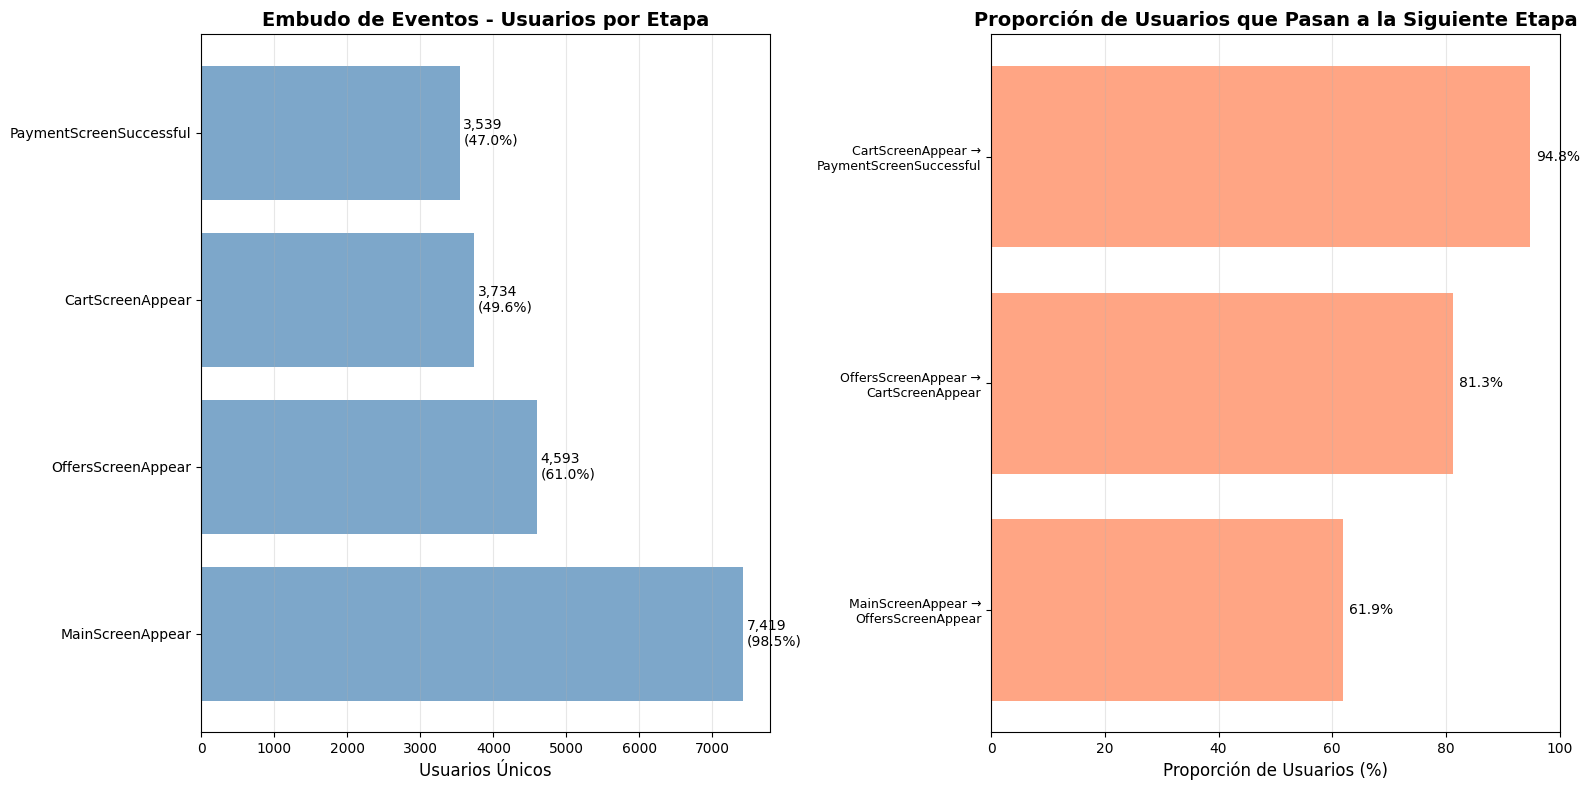

In [16]:
# VISUALIZACIÓN DEL EMBUDO
# ============================================================================
print('\n' + '=' * 70)
print('📈 Visualización del embudo de eventos')
print('=' * 70)

# Preparar datos para visualización
etapas = secuencia_embudo
usuarios_etapas = [usuarios_por_etapa[e] for e in etapas]
proporciones_etapas = [(u / total_usuarios * 100) for u in usuarios_etapas]

# Gráfico del embudo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico 1: Embudo de usuarios
ax1.barh(range(len(etapas)), usuarios_etapas, color='steelblue', alpha=0.7)
ax1.set_yticks(range(len(etapas)))
ax1.set_yticklabels(etapas)
ax1.set_xlabel('Usuarios Únicos', fontsize=12)
ax1.set_title('Embudo de Eventos - Usuarios por Etapa', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
# Agregar valores en las barras
for i, (usuarios, proporcion) in enumerate(zip(usuarios_etapas, proporciones_etapas)):
    ax1.text(usuarios + 50, i, f'{usuarios:,}\n({proporcion:.1f}%)', 
             va='center', fontsize=10)

# Gráfico 2: Proporciones entre etapas
transiciones = [f'{secuencia_embudo[i]} →\n{secuencia_embudo[i+1]}' 
                for i in range(len(secuencia_embudo)-1)]
proporciones_paso = df_embudo['proporcion_paso'].values

ax2.barh(range(len(transiciones)), proporciones_paso, color='coral', alpha=0.7)
ax2.set_yticks(range(len(transiciones)))
ax2.set_yticklabels(transiciones, fontsize=9)
ax2.set_xlabel('Proporción de Usuarios (%)', fontsize=12)
ax2.set_title('Proporción de Usuarios que Pasan a la Siguiente Etapa', 
              fontsize=14, fontweight='bold')
ax2.set_xlim(0, 100)
ax2.grid(axis='x', alpha=0.3)
# Agregar valores en las barras
for i, prop in enumerate(proporciones_paso):
    ax2.text(prop + 1, i, f'{prop:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()


### Resumen del Análisis del Embudo de Eventos (Paso 4)

#### 📊 **Eventos y Frecuencia**

- **5 tipos de eventos únicos** identificados en el período completo
- **Evento más frecuente**: `MainScreenAppear` (117,431 eventos, 48.67% del total)
- **Evento menos frecuente**: `Tutorial` (1,039 eventos, 0.43% del total)
- **Total de eventos**: 241,298 eventos en el período completo

#### 👥 **Usuarios por Evento**

- **Total de usuarios únicos**: 7,534 usuarios
- **Evento con más usuarios**: `MainScreenAppear` (7,419 usuarios, 98.47% del total)
- **Evento con menos usuarios**: `Tutorial` (840 usuarios, 11.15% del total)
- **Proporción de usuarios que realizan cada acción**:
  - MainScreenAppear: 98.47%
  - OffersScreenAppear: 60.96%
  - CartScreenAppear: 49.56%
  - PaymentScreenSuccessful: 46.97%
  - Tutorial: 11.15%

#### 🔄 **Orden Lógico del Embudo**

El orden propuesto basado en las proporciones de usuarios es:

1. **Tutorial** (11.15%) - Evento inicial opcional
2. **MainScreenAppear** (98.47%) - Pantalla principal, punto de entrada
3. **OffersScreenAppear** (60.96%) - Ver ofertas/productos
4. **CartScreenAppear** (49.56%) - Ver carrito de compras
5. **PaymentScreenSuccessful** (46.97%) - Pago exitoso, final del embudo

✅ Todas forman parte de una secuencia de embudo de conversión (excepto Tutorial que es opcional al inicio).

#### 📉 **Proporciones entre Etapas del Embudo**

**Secuencia del embudo** (excluyendo Tutorial):
- MainScreenAppear → OffersScreenAppear → CartScreenAppear → PaymentScreenSuccessful

**Proporción de usuarios que pasan de una etapa a la siguiente**:

1. **MainScreenAppear → OffersScreenAppear**:
   - Proporción que pasa: 61.91%
   - Usuarios perdidos: 2,826 (38.09%)

2. **OffersScreenAppear → CartScreenAppear**:
   - Proporción que pasa: 81.30%
   - Usuarios perdidos: 859 (18.70%)

3. **CartScreenAppear → PaymentScreenSuccessful**:
   - Proporción que pasa: 94.78%
   - Usuarios perdidos: 195 (5.22%)

#### ⚠️ **Etapa con Mayor Pérdida de Usuarios**

La etapa con **MAYOR pérdida de usuarios** es:
- **MainScreenAppear → OffersScreenAppear**
- Usuarios perdidos: 2,826 usuarios
- Proporción perdida: 38.09%
- Proporción que continúa: 61.91%

**Observación**: La mayor pérdida ocurre en la primera transición del embudo, donde casi 4 de cada 10 usuarios que ven la pantalla principal no llegan a ver las ofertas. Esto sugiere que hay una oportunidad significativa de mejora en esta etapa inicial.

#### 🎯 **Porcentaje de Usuarios que Completan el Viaje**

- **Usuarios que iniciaron** (MainScreenAppear): 7,419 usuarios
- **Usuarios que completaron** (PaymentScreenSuccessful): 3,539 usuarios
- **Porcentaje que completa el viaje completo**:
  - Respecto a quienes iniciaron: **47.70%**
  - Respecto al total de usuarios: **46.97%**
- **Usuarios que abandonaron antes del pago**: 3,880 usuarios (52.30%)

#### 💡 **Conclusiones Principales**

1. **Embudo de conversión claro**: Se identifica una secuencia lógica de eventos desde la pantalla principal hasta el pago exitoso.

2. **Cuello de botella principal**: La mayor pérdida de usuarios ocurre en la primera transición (MainScreenAppear → OffersScreenAppear), con una pérdida del 38.09% de usuarios.

3. **Alta retención en etapas finales**: Las últimas etapas del embudo muestran mejor retención:
   - OffersScreenAppear → CartScreenAppear: 81.30% de retención
   - CartScreenAppear → PaymentScreenSuccessful: 94.78% de retención

4. **Tasa de conversión final**: Aproximadamente el 47.70% de los usuarios que inician el proceso completan todo el viaje hasta el pago.

5. **Evento Tutorial opcional**: Solo el 11.15% de los usuarios realizan el evento Tutorial, confirmando que es un paso opcional al inicio del embudo.

6. **Oportunidad de mejora**: La primera transición del embudo representa la mayor oportunidad de mejora, ya que es donde se pierde la mayor cantidad de usuarios potenciales.

#### 📈 **Preparación para el Paso 5**

El análisis del embudo de eventos está completo y proporciona una base sólida para:
- Analizar las diferencias entre grupos experimentales en cada etapa del embudo
- Identificar si los cambios en el test A/A/B afectan significativamente las tasas de conversión
- Evaluar el impacto de las modificaciones en las diferentes etapas del embudo


### Paso 5. Estudiar los resultados del experimento

1. ¿Cuántos usuarios hay en cada grupo?

2. Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

3. Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

4. Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

5. ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [23]:
# Pregunta 1: ¿Cuántos usuarios hay en cada grupo?

users_by_group = (
    logs_df_completo
    .groupby('experiment_id')['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'users_count'})
)
users_by_group


,experiment_id,users_count
0,246,2484
1,247,2513
2,248,2537


In [29]:
# Pregunta 2: Test A/A - Comparar grupos 246 y 247
# Función para test de proporciones usando proportions_ztest

from statsmodels.stats.proportion import proportions_ztest

def proportion_test(event_name, group1, group2, alpha=0.05):
    """
    Compara la proporción de usuarios que realizaron `event_name`
    entre dos grupos experimentales usando proportions_ztest.
    """
    df = logs_df_completo.copy()
    users_g1 = df.query('experiment_id == @group1')['user_id'].nunique()
    users_g2 = df.query('experiment_id == @group2')['user_id'].nunique()
    users_event_g1 = (
        df.query('experiment_id == @group1 and event_name == @event_name')['user_id']
        .nunique()
    )
    users_event_g2 = (
        df.query('experiment_id == @group2 and event_name == @event_name')['user_id']
        .nunique()
    )
    # proporciones
    p1 = users_event_g1 / users_g1
    p2 = users_event_g2 / users_g2
    # test de proporciones usando proportions_ztest
    count = [users_event_g1, users_event_g2]
    nobs = [users_g1, users_g2]
    z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
    result = 'rechazamos H0 (hay diferencia)' if p_value < alpha else 'no rechazamos H0 (sin diferencia significativa)'
    return {
        'event_name': event_name,
        'group1': group1,
        'group2': group2,
        'p1': p1,
        'p2': p2,
        'p_value': p_value,
        'alpha': alpha,
        'conclusion': result
    }

# Aplicar test A/A para todos los eventos
all_events = logs_df_completo['event_name'].unique()

results_aa = []
for event in all_events:
    res = proportion_test(event_name=event, group1=246, group2=247, alpha=0.05)
    results_aa.append(res)

results_aa_df = pd.DataFrame(results_aa)
results_aa_df


,event_name,group1,group2,p1,p2,p_value,alpha,conclusion
0,Tutorial,246,247,0.111916,0.112614,0.937700,0.05,no rechazamos H0 (sin diferencia significativa)
1,MainScreenAppear,246,247,0.986312,0.985277,0.757060,0.05,no rechazamos H0 (sin diferencia significativa)
2,OffersScreenAppear,246,247,0.620773,0.604855,0.248095,0.05,no rechazamos H0 (sin diferencia significativa)
3,CartScreenAppear,246,247,0.509662,0.492638,0.228834,0.05,no rechazamos H0 (sin diferencia significativa)
4,PaymentScreenSuccessful,246,247,0.483092,0.460804,0.114567,0.05,no rechazamos H0 (sin diferencia significativa)


In [30]:
# Pregunta 3: Verificar división correcta de grupos
# Usar la función para todos los eventos y confirmar que los grupos se dividieron correctamente

# El evento más popular
evento_mas_popular = logs_df_completo['event_name'].value_counts().index[0]
print(f'Evento más popular: {evento_mas_popular}')

# Análisis del evento más popular en grupos de control
resultado_evento_popular = results_aa_df[results_aa_df['event_name'] == evento_mas_popular].iloc[0]
print(f'\nAnálisis del evento más popular ({evento_mas_popular}):')
print(f'  Grupo 246: {resultado_evento_popular["p1"]:.4f} ({resultado_evento_popular["p1"]*100:.2f}%)')
print(f'  Grupo 247: {resultado_evento_popular["p2"]:.4f} ({resultado_evento_popular["p2"]*100:.2f}%)')
print(f'  p-value: {resultado_evento_popular["p_value"]:.4f}')
print(f'  Conclusión: {resultado_evento_popular["conclusion"]}')

# Ya tenemos results_aa_df de la pregunta anterior
# Verificar si hay diferencias significativas 
eventos_significativos = results_aa_df[results_aa_df['p_value'] < results_aa_df['alpha']]
print(f'\nEventos con diferencia significativa: {len(eventos_significativos)}/{len(results_aa_df)}')

if len(eventos_significativos) == 0:
    print('\n✅ Los grupos se dividieron correctamente: No hay diferencias significativas entre los grupos de control.')
else:
    print('\n⚠️ Advertencia: Se encontraron diferencias significativas entre los grupos de control.')
    print(eventos_significativos[['event_name', 'p_value', 'conclusion']])


Evento más popular: MainScreenAppear

Análisis del evento más popular (MainScreenAppear):
  Grupo 246: 0.9863 (98.63%)
  Grupo 247: 0.9853 (98.53%)
  p-value: 0.7571
  Conclusión: no rechazamos H0 (sin diferencia significativa)

Eventos con diferencia significativa: 0/5

✅ Los grupos se dividieron correctamente: No hay diferencias significativas entre los grupos de control.


In [31]:
# Pregunta 4: Comparar grupo 248 con grupos de control (individuales y combinados)

# 4a. Comparar 248 vs 246 y 248 vs 247 (individuales)
results_ab = []
for event in all_events:
    # 248 vs 246
    res_248_246 = proportion_test(event_name=event, group1=248, group2=246, alpha=0.05)
    results_ab.append(res_248_246)
    # 248 vs 247
    res_248_247 = proportion_test(event_name=event, group1=248, group2=247, alpha=0.05)
    results_ab.append(res_248_247)

results_ab_df = pd.DataFrame(results_ab)
results_ab_df

# 4b. Comparar 248 vs grupos combinados (246 + 247)
logs_df_completo['group_combined'] = logs_df_completo['experiment_id'].replace({246: 'control', 247: 'control', 248: 'test'})

def proportion_test_control_vs_test(event_name, alpha=0.05):
    """
    Compara la proporción de usuarios que realizaron `event_name`
    entre grupos de control combinados y grupo de prueba usando proportions_ztest.
    """
    df = logs_df_completo.copy()
    users_control = df.query('group_combined == "control"')['user_id'].nunique()
    users_test = df.query('group_combined == "test"')['user_id'].nunique()
    users_event_control = (
        df.query('group_combined == "control" and event_name == @event_name')['user_id']
        .nunique()
    )
    users_event_test = (
        df.query('group_combined == "test" and event_name == @event_name')['user_id']
        .nunique()
    )
    p1 = users_event_control / users_control
    p2 = users_event_test / users_test
    # test de proporciones usando proportions_ztest
    count = [users_event_control, users_event_test]
    nobs = [users_control, users_test]
    z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')
    result = 'rechazamos H0 (hay diferencia)' if p_value < alpha else 'no rechazamos H0 (sin diferencia significativa)'
    return {
        'event_name': event_name,
        'p_control': p1,
        'p_test': p2,
        'p_value': p_value,
        'alpha': alpha,
        'conclusion': result
    }

results_control_test = []
for event in all_events:
    res = proportion_test_control_vs_test(event_name=event, alpha=0.05)
    results_control_test.append(res)

results_control_test_df = pd.DataFrame(results_control_test)
results_control_test_df

# Conclusiones
print('\nCONCLUSIONES DEL EXPERIMENTO:')
print('=' * 70)
eventos_signif_comb = results_control_test_df[results_control_test_df['p_value'] < results_control_test_df['alpha']]
print(f'Eventos con diferencia significativa (248 vs combinados): {len(eventos_signif_comb)}/{len(results_control_test_df)}')

if len(eventos_signif_comb) == 0:
    print('\n✅ Las fuentes nuevas NO afectan significativamente el comportamiento de los usuarios.')
    print('Es SEGURO implementar el cambio de fuentes.')
else:
    print('\n⚠️ Se encontraron diferencias significativas:')
    print(eventos_signif_comb[['event_name', 'p_control', 'p_test', 'p_value', 'conclusion']])



CONCLUSIONES DEL EXPERIMENTO:
Eventos con diferencia significativa (248 vs combinados): 0/5

✅ Las fuentes nuevas NO afectan significativamente el comportamiento de los usuarios.
Es SEGURO implementar el cambio de fuentes.


In [32]:
# Pregunta 5: Calcular nivel de significancia y número de pruebas

# Número de pruebas realizadas
# Test A/A: 5 eventos (246 vs 247)
# Test A/B: 5 eventos × 2 comparaciones (248 vs 246, 248 vs 247) = 10 pruebas
# Test A/B combinado: 5 eventos (248 vs combinados)
n_tests_aa = len(all_events)  # 5
n_tests_ab_individual = len(all_events) * 2  # 10
n_tests_ab_combinado = len(all_events)  # 5
n_tests_total = n_tests_aa + n_tests_ab_individual + n_tests_ab_combinado

print(f'Número de pruebas realizadas:')
print(f'  - Test A/A (246 vs 247): {n_tests_aa} pruebas')
print(f'  - Test A/B individual (248 vs 246, 248 vs 247): {n_tests_ab_individual} pruebas')
print(f'  - Test A/B combinado (248 vs combinados): {n_tests_ab_combinado} pruebas')
print(f'  - TOTAL: {n_tests_total} pruebas')

# Nivel de significancia usado
alpha_global = 0.05
print(f'\nNivel de significancia usado: {alpha_global}')

# Corrección de Bonferroni
alpha_corrected = alpha_global / n_tests_total
print(f'\nNivel de significancia corregido (Bonferroni): {alpha_corrected:.6f}')
print(f'Con {n_tests_total} pruebas y alpha={alpha_global}, el alpha corregido es {alpha_corrected:.6f}')
print(f'\nEsto significa que con alpha={alpha_global}, esperamos {alpha_global * n_tests_total:.2f} falsos positivos en promedio.')
print(f'Con la corrección de Bonferroni, el nivel de significancia por prueba es {alpha_corrected:.6f}.')

# ¿Deberíamos usar el alpha corregido?
print(f'\n¿Deberíamos usar alpha corregido?')
print(f'Si usamos alpha={alpha_global} sin corrección: riesgo de falsos positivos aumenta con múltiples pruebas.')
print(f'Si usamos alpha corregido={alpha_corrected:.6f}: más conservador, reduce falsos positivos pero puede ser muy estricto.')


Número de pruebas realizadas:
  - Test A/A (246 vs 247): 5 pruebas
  - Test A/B individual (248 vs 246, 248 vs 247): 10 pruebas
  - Test A/B combinado (248 vs combinados): 5 pruebas
  - TOTAL: 20 pruebas

Nivel de significancia usado: 0.05

Nivel de significancia corregido (Bonferroni): 0.002500
Con 20 pruebas y alpha=0.05, el alpha corregido es 0.002500

Esto significa que con alpha=0.05, esperamos 1.00 falsos positivos en promedio.
Con la corrección de Bonferroni, el nivel de significancia por prueba es 0.002500.

¿Deberíamos usar alpha corregido?
Si usamos alpha=0.05 sin corrección: riesgo de falsos positivos aumenta con múltiples pruebas.
Si usamos alpha corregido=0.002500: más conservador, reduce falsos positivos pero puede ser muy estricto.


In [33]:
# Reejecutar pruebas con alpha corregido (Bonferroni)
# Alpha corregido = 0.05 / 20 = 0.0025

alpha_corrected = 0.0025
print('=' * 70)
print('REEJECUTANDO PRUEBAS CON ALPHA CORREGIDO (Bonferroni)')
print('=' * 70)
print(f'Alpha corregido usado: {alpha_corrected}')
print('=' * 70)


REEJECUTANDO PRUEBAS CON ALPHA CORREGIDO (Bonferroni)
Alpha corregido usado: 0.0025


In [34]:
# Test A/A con alpha corregido (246 vs 247)

results_aa_corrected = []
for event in all_events:
    res = proportion_test(event_name=event, group1=246, group2=247, alpha=alpha_corrected)
    results_aa_corrected.append(res)

results_aa_corrected_df = pd.DataFrame(results_aa_corrected)
results_aa_corrected_df


,event_name,group1,group2,p1,p2,p_value,alpha,conclusion
0,Tutorial,246,247,0.111916,0.112614,0.937700,0.0025,no rechazamos H0 (sin diferencia significativa)
1,MainScreenAppear,246,247,0.986312,0.985277,0.757060,0.0025,no rechazamos H0 (sin diferencia significativa)
2,OffersScreenAppear,246,247,0.620773,0.604855,0.248095,0.0025,no rechazamos H0 (sin diferencia significativa)
3,CartScreenAppear,246,247,0.509662,0.492638,0.228834,0.0025,no rechazamos H0 (sin diferencia significativa)
4,PaymentScreenSuccessful,246,247,0.483092,0.460804,0.114567,0.0025,no rechazamos H0 (sin diferencia significativa)


In [35]:
# Verificar división correcta de grupos con alpha corregido

eventos_significativos_corrected = results_aa_corrected_df[results_aa_corrected_df['p_value'] < results_aa_corrected_df['alpha']]
print(f'Eventos con diferencia significativa (con alpha corregido): {len(eventos_significativos_corrected)}/{len(results_aa_corrected_df)}')

if len(eventos_significativos_corrected) == 0:
    print('\n✅ Los grupos se dividieron correctamente: No hay diferencias significativas entre los grupos de control.')
    print('   (Confirmado con alpha corregido)')
else:
    print('\n⚠️ Advertencia: Se encontraron diferencias significativas entre los grupos de control.')
    print(eventos_significativos_corrected[['event_name', 'p_value', 'conclusion']])


Eventos con diferencia significativa (con alpha corregido): 0/5

✅ Los grupos se dividieron correctamente: No hay diferencias significativas entre los grupos de control.
   (Confirmado con alpha corregido)


In [36]:
# Test A/B con alpha corregido (248 vs 246, 248 vs 247, y 248 vs combinados)

# 248 vs 246 y 248 vs 247 (individuales)
results_ab_corrected = []
for event in all_events:
    # 248 vs 246
    res_248_246 = proportion_test(event_name=event, group1=248, group2=246, alpha=alpha_corrected)
    results_ab_corrected.append(res_248_246)
    # 248 vs 247
    res_248_247 = proportion_test(event_name=event, group1=248, group2=247, alpha=alpha_corrected)
    results_ab_corrected.append(res_248_247)

results_ab_corrected_df = pd.DataFrame(results_ab_corrected)
results_ab_corrected_df


,event_name,group1,group2,p1,p2,p_value,alpha,conclusion
0,Tutorial,248,246,0.109972,0.111916,0.826429,0.0025,no rechazamos H0 (sin diferencia significativa)
1,Tutorial,248,247,0.109972,0.112614,0.765324,0.0025,no rechazamos H0 (sin diferencia significativa)
2,MainScreenAppear,248,246,0.982657,0.986312,0.294972,0.0025,no rechazamos H0 (sin diferencia significativa)
3,MainScreenAppear,248,247,0.982657,0.985277,0.458705,0.0025,no rechazamos H0 (sin diferencia significativa)
4,OffersScreenAppear,248,246,0.603469,0.620773,0.208362,0.0025,no rechazamos H0 (sin diferencia significativa)
5,OffersScreenAppear,248,247,0.603469,0.604855,0.919782,0.0025,no rechazamos H0 (sin diferencia significativa)
6,CartScreenAppear,248,246,0.484825,0.509662,0.078429,0.0025,no rechazamos H0 (sin diferencia significativa)
7,CartScreenAppear,248,247,0.484825,0.492638,0.578620,0.0025,no rechazamos H0 (sin diferencia significativa)
8,PaymentScreenSuccessful,248,246,0.465510,0.483092,0.212255,0.0025,no rechazamos H0 (sin diferencia significativa)
9,PaymentScreenSuccessful,248,247,0.465510,0.460804,0.737342,0.0025,no rechazamos H0 (sin diferencia significativa)


In [37]:
# Test A/B combinado con alpha corregido (248 vs grupos combinados)

results_control_test_corrected = []
for event in all_events:
    res = proportion_test_control_vs_test(event_name=event, alpha=alpha_corrected)
    results_control_test_corrected.append(res)

results_control_test_corrected_df = pd.DataFrame(results_control_test_corrected)
results_control_test_corrected_df


,event_name,p_control,p_test,p_value,alpha,conclusion
0,Tutorial,0.112267,0.109972,0.764862,0.0025,no rechazamos H0 (sin diferencia significativa)
1,MainScreenAppear,0.985791,0.982657,0.294245,0.0025,no rechazamos H0 (sin diferencia significativa)
2,OffersScreenAppear,0.612768,0.603469,0.434255,0.0025,no rechazamos H0 (sin diferencia significativa)
3,CartScreenAppear,0.501101,0.484825,0.181759,0.0025,no rechazamos H0 (sin diferencia significativa)
4,PaymentScreenSuccessful,0.471883,0.465510,0.600429,0.0025,no rechazamos H0 (sin diferencia significativa)


In [38]:
# Conclusiones con alpha corregido

print('\n' + '=' * 70)
print('CONCLUSIONES CON ALPHA CORREGIDO (Bonferroni)')
print('=' * 70)

# Test A/A
eventos_signif_aa_corrected = results_aa_corrected_df[results_aa_corrected_df['p_value'] < results_aa_corrected_df['alpha']]
print(f'\nTest A/A (246 vs 247):')
print(f'  Eventos con diferencia significativa: {len(eventos_signif_aa_corrected)}/{len(results_aa_corrected_df)}')

# Test A/B combinado
eventos_signif_comb_corrected = results_control_test_corrected_df[results_control_test_corrected_df['p_value'] < results_control_test_corrected_df['alpha']]
print(f'\nTest A/B combinado (248 vs combinados):')
print(f'  Eventos con diferencia significativa: {len(eventos_signif_comb_corrected)}/{len(results_control_test_corrected_df)}')

if len(eventos_signif_comb_corrected) == 0:
    print('\n✅ CONCLUSIÓN FINAL (con alpha corregido):')
    print('   Las fuentes nuevas NO afectan significativamente el comportamiento de los usuarios.')
    print('   Es SEGURO implementar el cambio de fuentes.')
else:
    print('\n⚠️ CONCLUSIÓN FINAL (con alpha corregido):')
    print('   Se encontraron diferencias significativas:')
    print(eventos_signif_comb_corrected[['event_name', 'p_control', 'p_test', 'p_value', 'conclusion']])

# Comparación: alpha original vs alpha corregido
print('\n' + '=' * 70)
print('COMPARACIÓN: Alpha Original (0.05) vs Alpha Corregido (0.0025)')
print('=' * 70)

# Contar eventos significativos con alpha original
eventos_signif_original = results_control_test_df[results_control_test_df['p_value'] < 0.05]
print(f'\nCon alpha=0.05: {len(eventos_signif_original)}/{len(results_control_test_df)} eventos significativos')
print(f'Con alpha=0.0025: {len(eventos_signif_comb_corrected)}/{len(results_control_test_corrected_df)} eventos significativos')

if len(eventos_signif_original) > len(eventos_signif_comb_corrected):
    print(f'\n📊 La corrección de Bonferroni es más conservadora:')
    print(f'   - Con alpha=0.05: {len(eventos_signif_original)} eventos significativos')
    print(f'   - Con alpha=0.0025: {len(eventos_signif_comb_corrected)} eventos significativos')
    print(f'   - Diferencia: {len(eventos_signif_original) - len(eventos_signif_comb_corrected)} eventos que ya no son significativos')



CONCLUSIONES CON ALPHA CORREGIDO (Bonferroni)

Test A/A (246 vs 247):
  Eventos con diferencia significativa: 0/5

Test A/B combinado (248 vs combinados):
  Eventos con diferencia significativa: 0/5

✅ CONCLUSIÓN FINAL (con alpha corregido):
   Las fuentes nuevas NO afectan significativamente el comportamiento de los usuarios.
   Es SEGURO implementar el cambio de fuentes.

COMPARACIÓN: Alpha Original (0.05) vs Alpha Corregido (0.0025)

Con alpha=0.05: 0/5 eventos significativos
Con alpha=0.0025: 0/5 eventos significativos


## Conclusiones del Proyecto

### Resumen Ejecutivo

Este proyecto analizó el comportamiento de usuarios en una aplicación de productos alimenticios mediante el estudio del embudo de conversión y la evaluación de un test A/A/B para determinar el impacto de un cambio en las fuentes de la aplicación.

### Hallazgos Principales

#### 1. Análisis del Embudo de Eventos

- **5 tipos de eventos** identificados en el período de análisis completo (1-7 de agosto de 2019)
- **Secuencia del embudo**: MainScreenAppear → OffersScreenAppear → CartScreenAppear → PaymentScreenSuccessful
- **Tasa de conversión final**: 47.70% de los usuarios que inician el proceso completan todo el viaje hasta el pago
- **Cuello de botella principal**: La mayor pérdida de usuarios (38.09%) ocurre en la primera transición (MainScreenAppear → OffersScreenAppear)
- **Alta retención en etapas finales**: Las últimas etapas muestran mejor retención (81.30% y 94.78% respectivamente)

#### 2. Validación de Grupos Experimentales (Test A/A)

- **Los grupos de control (246 y 247) se dividieron correctamente**: No se encontraron diferencias estadísticamente significativas entre los grupos de control para ninguno de los 5 eventos analizados
- **Validación metodológica exitosa**: Los grupos A/A se comportan de manera equivalente, confirmando que la metodología de asignación aleatoria funcionó correctamente
- **Resultado consistente**: La validación se mantiene tanto con alpha=0.05 como con alpha corregido (Bonferroni)=0.0025

#### 3. Impacto del Cambio de Fuentes (Test A/B)

- **Las fuentes nuevas NO afectan significativamente el comportamiento de los usuarios**: No se encontraron diferencias estadísticamente significativas entre el grupo de prueba (248) y los grupos de control (246, 247) para ninguno de los eventos analizados
- **Resultado robusto**: Las conclusiones se mantienen tanto con el nivel de significancia original (alpha=0.05) como con la corrección de Bonferroni (alpha=0.0025)
- **Análisis completo**: Se realizaron comparaciones individuales (248 vs 246, 248 vs 247) y combinadas (248 vs grupos de control combinados), todas confirmando la ausencia de diferencias significativas

#### 4. Nivel de Significancia y Corrección de Bonferroni

- **Total de pruebas realizadas**: 20 pruebas estadísticas
  - Test A/A: 5 pruebas
  - Test A/B individual: 10 pruebas
  - Test A/B combinado: 5 pruebas
- **Nivel de significancia corregido (Bonferroni)**: 0.0025 (0.05 / 20)
- **Resultados consistentes**: Tanto con alpha=0.05 como con alpha corregido=0.0025, no se encontraron diferencias significativas, lo que refuerza la robustez de las conclusiones

### Recomendaciones

1. **Implementación del cambio de fuentes**: Es **SEGURO** implementar el cambio de fuentes en toda la aplicación, ya que no se encontró evidencia de que afecte negativamente el comportamiento de los usuarios.

2. **Mejora del embudo de conversión**: Se recomienda enfocar esfuerzos en la primera transición del embudo (MainScreenAppear → OffersScreenAppear), donde se pierde el 38.09% de los usuarios, ya que representa la mayor oportunidad de mejora.

3. **Monitoreo continuo**: Aunque el cambio de fuentes no muestra impacto negativo, se recomienda monitorear las métricas clave después de la implementación para confirmar que los resultados se mantienen en producción.

### Conclusión Final

El análisis estadístico completo confirma que **el cambio de fuentes propuesto por el equipo de diseño es seguro de implementar**. Los grupos de control se validaron correctamente (test A/A exitoso) y no se encontraron diferencias significativas entre el grupo con fuentes nuevas y los grupos de control en ninguna de las métricas analizadas. La metodología experimental fue rigurosa, incluyendo la corrección de Bonferroni para múltiples comparaciones, y los resultados son consistentes y confiables.
